In [2]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [6]:
#Data Handling and Manipulation
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)  

#Statistical Analysis
from scipy import stats

#Plotting and Visualization
import matplotlib.pyplot as plt
import matplotlib.pylab as plt
plt.rcParams['figure.dpi'] = 120



#Machine Learning
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier

In [7]:
#Load customer loans dataset
data_loans = pd.read_csv('CustomerLoans.csv',sep=',')
data_loans.head()

,custid,Income,CreditScore,Debt,Date,LoanTerm,InterestRate,CreditIncidents,HomeValue,LoanAmount,ProductType,LoanStatus
0,92886957,43415,658,23878.25,2017-09-01,180,0.036,3,179930.0,71972.0,Government_insured,Approved
1,16462625,564164,786,5641.64,2019-09-13,480,0.038,5,386400.0,38640.0,Fixed_rate,Approved
2,89457436,466344,676,233172.00,2018-06-05,180,0.037,4,375840.0,75168.0,Government_insured,Approved
3,68462543,756171,694,378085.50,2018-04-26,180,0.036,2,675540.0,67554.0,Government_insured,Approved
4,63315493,58948,688,30063.48,2017-06-08,420,0.035,0,731690.0,146338.0,Government_insured,Approved


In [8]:
#Load demographics dataset
data_demographics = pd.read_csv('Demographics.csv',sep=',')
data_demographics.head()

,custid,Name,Job,Age,Lat,Long,Income,CreditScore,HouseholdSize,ZipCode,MajorCity,State,MedianHomeValue,MedianHouseholdIncome,Debt
0,92886957,Barbara Thompson,Automotive Service Technicians and Mechanics,39,31.84568,-102.36764,43415,658,4,79761,Odessa,TX,94700,44174,23878.25
1,16462625,James Wade,Prosthodontists,93,42.73920,-84.62081,564164,786,4,48917,Lansing,MI,138000,51830,5641.64
2,89457436,Joel Jackson,Surgeons,99,44.27804,-88.27205,466344,676,1,54140,Little Chute,WI,139200,58247,233172.00
3,68462543,Tyler Clements,Physicians and Surgeons,100,33.50921,-111.89903,756171,694,2,85250,Scottsdale,AZ,250200,59358,378085.50
4,63315493,Adam Stephens,"Railroad Brake, Signal, and Switch Operators",97,33.93113,-117.54866,58948,688,2,92860,Norco,CA,385100,84905,30063.48


In [9]:
#Examine Missing Data
data_loans.isna().sum()
data_demographics.isna().sum()

custid                   0
Name                     0
Job                      0
Age                      0
Lat                      0
Long                     0
Income                   0
CreditScore              0
HouseholdSize            0
ZipCode                  0
MajorCity                0
State                    0
MedianHomeValue          0
MedianHouseholdIncome    0
Debt                     0
dtype: int64

In [10]:
#Examin outliers in customer loans dataset 
num_cols_loans = ['Income','CreditScore','Debt','LoanTerm','InterestRate','CreditIncidents','HomeValue','LoanAmount']
data_loans[(np.abs(stats.zscore(data_loans[num_cols_loans])) > 3).all(axis=1)]

,custid,Income,CreditScore,Debt,Date,LoanTerm,InterestRate,CreditIncidents,HomeValue,LoanAmount,ProductType,LoanStatus


In [11]:
#Examin outliers in demographics dataset 
num_cols_customer = ['Age','Income','CreditScore','HouseholdSize','MedianHomeValue','Debt']
data_demographics[(np.abs(stats.zscore(data_demographics[num_cols_customer])) > 3).all(axis=1)]

,custid,Name,Job,Age,Lat,Long,Income,CreditScore,HouseholdSize,ZipCode,MajorCity,State,MedianHomeValue,MedianHouseholdIncome,Debt


In [12]:
#Providing descriptive statistics 
data_loans[num_cols_loans].describe()
data_demographics[num_cols_customer].describe()

,Age,Income,CreditScore,HouseholdSize,MedianHomeValue,Debt
count,48427.000000,48427.000000,48427.000000,48427.000000,4.842700e+04,48427.000000
mean,58.968509,182892.674665,700.479505,2.935408,2.324090e+05,36802.268387
std,23.886030,256729.653035,64.881945,1.876389,1.566480e+05,60675.888778
min,18.000000,10000.000000,620.000000,1.000000,4.860000e+04,0.000000
25%,38.000000,29018.500000,645.000000,2.000000,1.273000e+05,12851.560000
50%,59.000000,48407.000000,667.000000,3.000000,1.901000e+05,22052.250000
75%,80.000000,231794.000000,780.000000,4.000000,2.831000e+05,34402.530000
max,100.000000,949942.000000,799.000000,10.000000,1.000001e+06,924099.820000


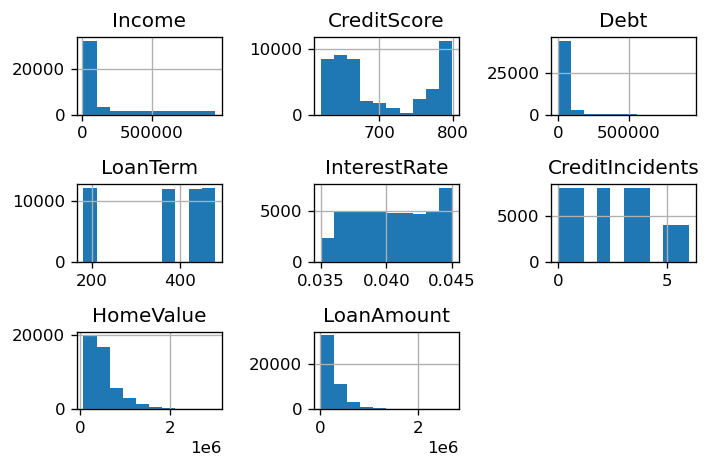

In [13]:
#Data histograms for customer loans 
data_loans[num_cols_loans].hist()
plt.tight_layout()

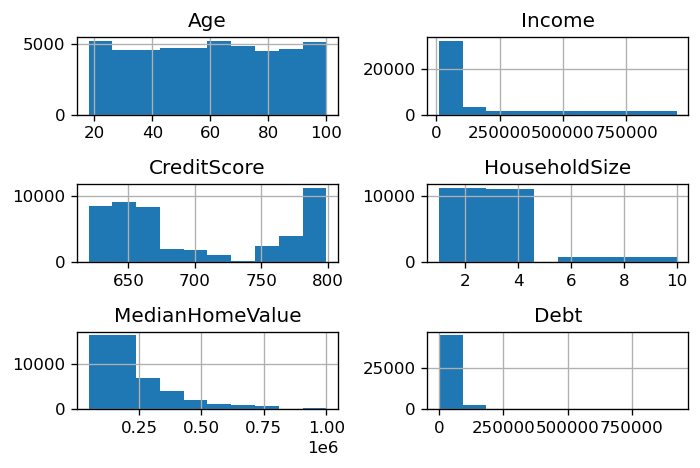

In [14]:
#Data histograms for demographics
data_demographics[num_cols_customer].hist()
plt.tight_layout()

In [16]:
#Joining datasets together
cols_to_use =data_demographics.columns.difference(data_loans.columns).tolist()
cols_to_use.append('custid')
df = data_loans.merge(data_demographics[cols_to_use], on = 'custid')
df.head()

,custid,Income,CreditScore,Debt,Date,LoanTerm,InterestRate,CreditIncidents,HomeValue,LoanAmount,ProductType,LoanStatus,Age,HouseholdSize,Job,Lat,Long,MajorCity,MedianHomeValue,MedianHouseholdIncome,Name,State,ZipCode
0,92886957,43415,658,23878.25,2017-09-01,180,0.036,3,179930.0,71972.0,Government_insured,Approved,39,4,Automotive Service Technicians and Mechanics,31.84568,-102.36764,Odessa,94700,44174,Barbara Thompson,TX,79761
1,16462625,564164,786,5641.64,2019-09-13,480,0.038,5,386400.0,38640.0,Fixed_rate,Approved,93,4,Prosthodontists,42.73920,-84.62081,Lansing,138000,51830,James Wade,MI,48917
2,89457436,466344,676,233172.00,2018-06-05,180,0.037,4,375840.0,75168.0,Government_insured,Approved,99,1,Surgeons,44.27804,-88.27205,Little Chute,139200,58247,Joel Jackson,WI,54140
3,68462543,756171,694,378085.50,2018-04-26,180,0.036,2,675540.0,67554.0,Government_insured,Approved,100,2,Physicians and Surgeons,33.50921,-111.89903,Scottsdale,250200,59358,Tyler Clements,AZ,85250
4,63315493,58948,688,30063.48,2017-06-08,420,0.035,0,731690.0,146338.0,Government_insured,Approved,97,2,"Railroad Brake, Signal, and Switch Operators",33.93113,-117.54866,Norco,385100,84905,Adam Stephens,CA,92860


In [17]:
#Create features 
num_features = ['Income','CreditScore','Debt','LoanTerm','InterestRate','CreditIncidents','HomeValue','LoanAmount',
               'Lat','Long','MedianHomeValue','MedianHouseholdIncome']
df_features = df[num_features]
# df_product_type = pd.get_dummies(df.ProductType,prefix='ProductType')
# df_features = pd.concat([df_features,df_product_type],axis=1)
features = df_features.values
targets = np.argmax(pd.get_dummies(df.LoanStatus).values,axis=1)
# print(features.shape)

In [18]:
#Scaling data 
scaler=MinMaxScaler()
X = scaler.fit_transform(features)

In [19]:
#Neural Network Model Creation

def create_model(input_shape):
    model = Sequential()
    model.add(Dense(128, input_dim=input_shape, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
    return model

In [20]:
#Training and evaluate Model 

def train_and_evaluate__model(model, data_train, labels_train, data_test, labels_test):
    history = model.fit(data_train,labels_train,validation_data=(data_test,labels_test),epochs=30,batch_size=128)
    val_acc = history.history['val_accuracy'][-1]  # change this line if running on windows to: val_acc = history.history['val_accuracy'][-1] 
    return val_acc, history

In [21]:
#K-Fold cross validation 

scores = []
models = []
historys = []
num_splits = 3
kf = KFold(n_splits=num_splits)
kf.get_n_splits(X)
input_shape = X.shape[1]
print(input_shape)

fold = 0
for train_index, test_index in kf.split(X):
    print("Running fold {}".format(fold))
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = targets[train_index], targets[test_index]
    model = create_model(input_shape)
    score, history = train_and_evaluate__model(model,X_train,y_train,X_test,y_test)
    scores.append(score)
    models.append(model)
    historys.append(history)
    fold += 1
    
print('\n\nEstimated Accuracy ' , (np.round(np.mean(scores),2)))

12
Running fold 0
Epoch 1/30
254/254 [==============================] - 0s 2ms/step - loss: 0.5572 - accuracy: 0.7726 - val_loss: 0.5127 - val_accuracy: 0.7790
Epoch 2/30
254/254 [==============================] - 0s 1ms/step - loss: 0.4992 - accuracy: 0.7758 - val_loss: 0.4670 - val_accuracy: 0.7790
Epoch 3/30
254/254 [==============================] - 0s 1ms/step - loss: 0.4444 - accuracy: 0.7758 - val_loss: 0.3960 - val_accuracy: 0.7790
Epoch 4/30
254/254 [==============================] - 0s 1ms/step - loss: 0.3823 - accuracy: 0.8104 - val_loss: 0.3448 - val_accuracy: 0.8712
Epoch 5/30
254/254 [==============================] - 0s 1ms/step - loss: 0.3443 - accuracy: 0.8709 - val_loss: 0.3164 - val_accuracy: 0.8826
Epoch 6/30
254/254 [==============================] - 0s 1ms/step - loss: 0.3181 - accuracy: 0.8808 - val_loss: 0.2943 - val_accuracy: 0.8916
Epoch 7/30
254/254 [==============================] - 0s 1ms/step - loss: 0.2963 - accuracy: 0.8880 - val_loss: 0.2768 - val_accur

254/254 [==============================] - 0s 1ms/step - loss: 0.1645 - accuracy: 0.9332 - val_loss: 0.1633 - val_accuracy: 0.9331
Epoch 29/30
254/254 [==============================] - 0s 1ms/step - loss: 0.1623 - accuracy: 0.9350 - val_loss: 0.1761 - val_accuracy: 0.9207
Epoch 30/30
254/254 [==============================] - 0s 1ms/step - loss: 0.1616 - accuracy: 0.9353 - val_loss: 0.1589 - val_accuracy: 0.9333
Running fold 2
Epoch 1/30
254/254 [==============================] - 0s 2ms/step - loss: 0.5582 - accuracy: 0.7741 - val_loss: 0.4970 - val_accuracy: 0.7822
Epoch 2/30
254/254 [==============================] - 0s 1ms/step - loss: 0.4777 - accuracy: 0.7742 - val_loss: 0.4244 - val_accuracy: 0.7822
Epoch 3/30
254/254 [==============================] - 0s 1ms/step - loss: 0.4167 - accuracy: 0.7742 - val_loss: 0.3681 - val_accuracy: 0.7822
Epoch 4/30
254/254 [==============================] - 0s 1ms/step - loss: 0.3709 - accuracy: 0.7742 - val_loss: 0.3307 - val_accuracy: 0.7822


In [22]:
#model creation after K-Fold cross validation 
X_train, X_test, y_train, y_test = train_test_split(X, targets, test_size=0.20, random_state=42)
model = create_model(input_shape)
history = model.fit(X_train, y_train, validation_data=(X_test,y_test),epochs=30,batch_size=128)


Epoch 1/30
305/305 [==============================] - 0s 1ms/step - loss: 0.6184 - accuracy: 0.7501 - val_loss: 0.5614 - val_accuracy: 0.7764
Epoch 2/30
305/305 [==============================] - 0s 1ms/step - loss: 0.5273 - accuracy: 0.7770 - val_loss: 0.4931 - val_accuracy: 0.7764
Epoch 3/30
305/305 [==============================] - 0s 1ms/step - loss: 0.4597 - accuracy: 0.7871 - val_loss: 0.4115 - val_accuracy: 0.8206
Epoch 4/30
305/305 [==============================] - 0s 1ms/step - loss: 0.3712 - accuracy: 0.8558 - val_loss: 0.3262 - val_accuracy: 0.8810
Epoch 5/30
305/305 [==============================] - 0s 930us/step - loss: 0.3126 - accuracy: 0.8786 - val_loss: 0.2925 - val_accuracy: 0.8872
Epoch 6/30
305/305 [==============================] - 0s 956us/step - loss: 0.2875 - accuracy: 0.8861 - val_loss: 0.2756 - val_accuracy: 0.8927
Epoch 7/30
305/305 [==============================] - 0s 984us/step - loss: 0.2711 - accuracy: 0.8941 - val_loss: 0.2560 - val_accuracy: 0.9003


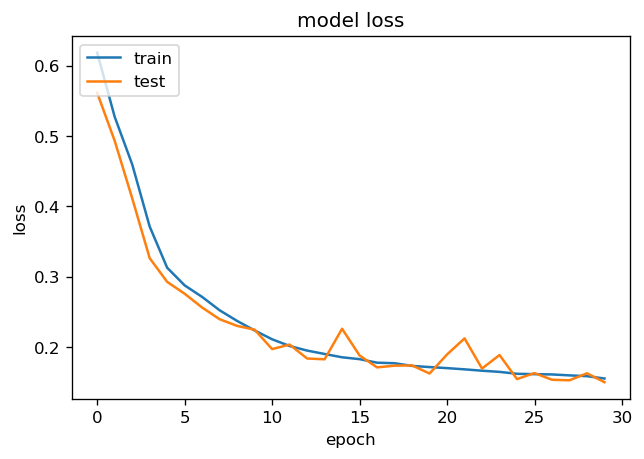

In [23]:
#model performance (loss)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show();

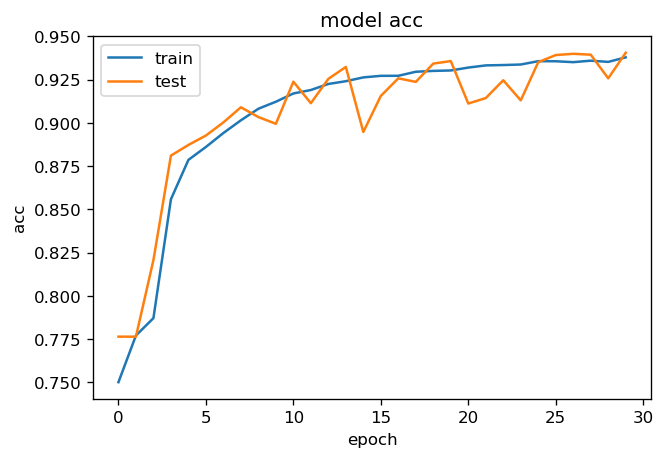

In [24]:
#model performance (accuracy)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model acc')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show();